# Avaliação C3

- Disciplina: Análise de Dados Aplicada a Computação
- Professor: Howard Roatti
- Turma: 5SC1
- Atividade: Análise de Dados e Machine Learning Hackathon

Integrantes:
- Gabriel Cardozo Ansesqui Rangel
- Lucas Carlos Giacomin
- Matheus de Paula Barbosa
- Nathan da Silva Bravin

# Importações

Possuem o objetivo de permitir a construção de estruturas de dados para podermos realizar análises; permite a importação de métodos úteis para classificação e mensurização dos dados; e também importam certos métodos de cálculo relevantes para certas questões.

In [1]:
# Importando biblioteca Pandas para a criação e manipulação de DataFrames.
import pandas as pd

# Importando o Numpy.
import numpy as np

# Importando o método PLT para visualizar graficamente os dados, cálculos e regressões que aplicarmos.
import matplotlib.pylab as plt

# Importando modelos para a realização dos testes de treino.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importando métricas de avaliações para os modelos.
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_auc_score, roc_curve

# Importando o método de validação cruzada K-Fold, pontuação do modelo e o separador de dados para treino e teste.
from sklearn.model_selection import KFold, cross_val_score,train_test_split

In [2]:
# Importando dataset de dados de treino:
dadosTreino = pd.read_csv("./Datasets/ticdata2000.txt", sep="	", header=None)
dadosTreino.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Importando dataset de dados de validação:
dadosValidacao = pd.read_csv("./Datasets/ticeval2000.txt", sep="	", header=None)
dadosValidacao.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# Importando dataset de rótulos de classificação:
dadosClassificao = pd.read_csv("./Datasets/tictgts2000.txt", header=None)
dadosClassificao.head()

,0
0,0
1,1
2,0
3,0
4,0


# Análise Exploratória de Dados

Os dados utilizados nesse trabalho são de uma empresa de seguros, onde foram coletadas diversas informações sobre o tipo de consumidor que possui estes contratos.

Os dados de cada dataset estão codificados e possuem um dicionário, onde cada tabela se refere a um desses valores. Por exemplo, a última tabela se refere que o individuo possui ou não uma apólice contratada.

## Métricas

In [5]:
# O método describe mostra diversas métricas sobre o dataset:
dadosTreino.describe()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [6]:
# Mostra os tipos de dados inclusos no dataset:
dadosTreino.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
81    int64
82    int64
83    int64
84    int64
85    int64
Length: 86, dtype: object

In [7]:
# Mostra se há algum valor faltante na tabela:
dadosTreino.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
81    0
82    0
83    0
84    0
85    0
Length: 86, dtype: int64

## Gráficos:

<AxesSubplot:ylabel='Frequency'>

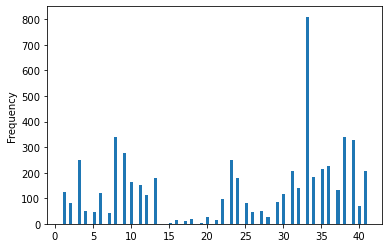

In [8]:
dadosTreino[0].plot.hist(bins=100)

**Comentário:** O histograma acima mostra o subtipo de cada cliente, tendo em vista isso, podemos observar que a maior parte do subtipo de família que está mais suscetível a solicitar o seguro são famílias grandes de baixa classe, e com base nos segundos subtipos que mais solicitam podemos constatar que maior parte dos pedidos são por famílias tradicionais que possívelmente não possuem outros meios de repor seus bens perdidos.

<AxesSubplot:ylabel='Frequency'>

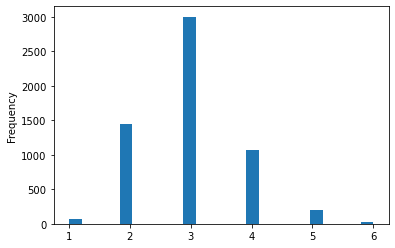

In [9]:
dadosTreino[3].plot.hist(bins=24)

**Comentário:** O histograma acima mostra a faixa de idades de cada cliente. A esmagadora maioria dos pedidos são compostos por pessoas entre 40 e 50 anos, ou seja, de meia idade, que tendem mais a tomar ações conservadoras.

<AxesSubplot:ylabel='Frequency'>

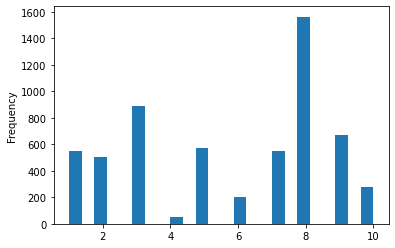

In [10]:
dadosTreino[4].plot.hist(bins=24)

**Comentário:** O histograma acima mostra o tipo principal de cada cliente. Os dados nos mostram que a maior parte dos pedidos são constituidos por famílias majoritariamente por adultos, esta análise pode não ser útil posteriormente pois crianças e adolescentes não podem utilizar carros, o que logicamente coloca os adultos em posição superior.

# Balanceamento de Dados

Realizamos o balanceamento em ambos datasets de treino e classificação para conseguirmos melhores resultados.

In [11]:
# Exibição da quantidade de indivíduos com seguros mobiliários no dataset de treino:
print('Dados de treino originais:')
dadosTreino[85].value_counts()

Dados de treino originais:


0    5474
1     348
Name: 85, dtype: int64

In [12]:
# Realizando o balanceamento dos dados de treino:
qt = dadosTreino[85].value_counts()[1] / dadosTreino[85].value_counts()[0]
dadosTreinoBalanceados = dadosTreino[dadosTreino[85] == 0].sample(frac = qt, random_state = 1)
dadosTreinoBalanceados = dadosTreinoBalanceados.append(dadosTreino[dadosTreino[85] == 1])

# Exibindo os dados balançeados:
print('Dados de treino balanceados:')
dadosTreinoBalanceados[85].value_counts()

Dados de treino balanceados:


0    348
1    348
Name: 85, dtype: int64

In [13]:
# Exibição da quantidade de indivíduos com seguros mobiliários no dataset de classificação:
print('Dados de classificação originais:')
dadosClassificao[0].value_counts()

Dados de classificação originais:


0    3762
1     238
Name: 0, dtype: int64

In [14]:
# Realizando o balanceamento dos dados de classificação:
qt = dadosClassificao[0].value_counts()[1] / dadosClassificao[0].value_counts()[0]
dadosClassificaoBalanceados = dadosClassificao[dadosClassificao[0] == 0].sample(frac = qt, random_state = 1)
dadosClassificaoBalanceados = dadosClassificaoBalanceados.append(dadosClassificao[dadosClassificao[0] == 1])

# Exibindo os dados balançeados:
print('Dados de classificação balanceados:')
dadosTreinoBalanceados[85].value_counts()

Dados de classificação balanceados:


0    348
1    348
Name: 85, dtype: int64

# Treino de Modelos

**Modelos escolhidos:**

Foram escolhidos os quatro modelos abaixo para análise, com somente um (o melhor) sendo aplicado nos dados propostos:

 - Regressão Logistica
 - kNN
 - Árvore de Decisão
 - Naive Bayes

Descrevemos mais sobre esses modelos em cada treino.

**Método de validação cruzada escolhida:**

Usamos o método de validação cruzada K-Fold em cada modelo.

O método K-Fold consiste em dividir o conjunto de dados total em k subconjuntos mutuamente exclusivos de mesmo tamanho, onde um subconjunto é usado para teste e os k-1 restantes são usados ​​para estimativa de parâmetros, calculando a precisão do modelo.

**Métricas utilizadas:**

Utilizamos diversas métricas para verificar a qualidade do modelo.

Usamos a **matriz de confusão** para tirar as métricas abaixo:

- **Precisão _(Precision)_:** Proporção de amostras classificadas
corretamente como "Sim" e realmente são "Sim".
- **Revocação _(Recall)_:** Proporção de amostras que são "Sim" e que foram classificadas como "Sim".
- **Especificidade _(Specificity)_:** Proporção de amostras que são "Não" e que foram classificados como "Não".
- **F1 Score** é a média harmônica entre as métricas de precisão e revocação.
    - **Micro** é a média das somas de cada amostra.
    - **Macro** é a média global da soma dos que são realmente "Sim", os realmente "Não" e os "Não".
- **ROC** é uma curva traçada pela taxa de verdadeiros positivos e falsos positivo.
- **AUC** é a área abaixo da linha ROC _(area under the ROC)_, este número resume a linha ROC em um valor, agregandos todos os limiares da ROC. 

## Modelo de Regressão Logística (_Logistic Regression_)

Apesar de possuir regressão no nome, é um modelo de classificação; É baseado no modelo clássico de regressão, em outras palavras, utiliza-se intervalos de variáveis em um gráfico e analisa-se os mais próximos da reta de regressão, com seus resultados podendo ser entre 0 e 1.
- Não atua somente como classificador, mas atua conjuntamente fornecendo a probabilidade para cada variável classificada.
- É fácil de implementar e de interpretar, além de ser bastante performático.
- Escolhemos esse modelo pois os coeficientes permitem que nós possamos visualizar o quão relevante é o atributo para a predição.
- É menos suscetível a overfitting do que os outros algorítmos de classificação.
- Requer uma atenção redobrada no pré-processamento dos dados.

In [15]:
# Separação dos dados:
X = dadosTreinoBalanceados.drop([85], axis=1)
y = dadosTreinoBalanceados[85]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
model = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
model.fit(X_train, y_train)
lr_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', lr_pred)

Resultados do modelo:
 [0.66666667 0.38095238 0.47619048 0.52380952 0.71428571 0.57142857
 0.52380952 0.66666667 0.66666667 0.5       ]

Média dos resultados: 0.569047619047619

Predições feitas:
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 

**Comentário:** Baseado nos resultados obtidos pelo valor da validação cruzada, é observado que o modelo possui resultado não muito acima de 50%, o que o coloca com resultado mediano, porém não confiável o suficiente para ser implementado.

In [16]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[250,  98],
       [102, 246]], dtype=int64)

In [17]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.7183908045977011 

Precisão (Precision):  0.7102272727272727 

Especificidade (Specificity):  0.7068965517241379 

F1 Macro:  0.712634186622626 

F1 Micro:  0.7126436781609196


**Comentário:** Os resultados aparentam ser um bom modelo ou possuirem resultados medianos.

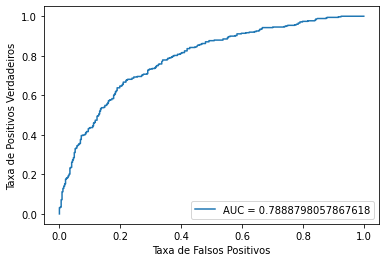

In [18]:
# Realizando cálculo da curva ROC e métrica AUC:
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

# Visualização da curva ROC de acordo com a métrica AUC:
plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

**Comentário:** A curva ROC obtida nos mostra que o modelo possui aceitável acertividade. A métrica AUC nos informa de forma semelhante sobre a qualidade das previsões, e como podemos ver acima, a taxa de acerto é também aceitável.

## Modelo kNN

kNN é um classificador onde o aprendizado é baseado em quão semelhante um dado é a outro. O treinamento consiste em vetores n-dimensionais.

 - Tendo em vista que o modelo Naive Bayes não correlaciona as variáveis, neste modelo buscamos predições correlacionando as variáveis, para um ponto de vista diferente. 
 - O método funciona calculando a distância entre os itens, buscando os mais próximos dos que queremos classificar e calculando a moda das características.
 - Neste modelo não é utilizado a base de treino para desenvolver uma função de discriminação, ou seja, não possui fases de treino propriamente ditos. Por isso o modelo tende a memorizar todo o dataset e calcular todas as distâncias para promover uma predição, o que não é performático e requer cuidados extras.
 - É bom para datasets pequenos onde não se sabe muitas informações.
 - Possui problemas com overfitting e underfitting, dependendo do tamanho do "K" escolhido.

In [19]:
# Separação dos dados:
X = dadosTreinoBalanceados.drop([85], axis=1)
y = dadosTreinoBalanceados[85]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Criação e treino do modelo kNN:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
knn_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', knn_pred)

Resultados do modelo:
 [0.71428571 0.47619048 0.52380952 0.57142857 0.76190476 0.47619048
 0.57142857 0.57142857 0.52380952 0.75      ]

Média dos resultados: 0.5940476190476189

Predições feitas:
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1

**Comentário:** Baseado nos resultados obtidos pelo valor da validação cruzada, é observado que o modelo possui uma média maior que o anterior, mas ainda o coloca como um resultado mediano em parâmetros gerais.

In [20]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[272,  76],
       [151, 197]], dtype=int64)

In [21]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.7816091954022989 

Precisão (Precision):  0.6430260047281324 

Especificidade (Specificity):  0.5660919540229885 

F1 Macro:  0.6700188600036342 

F1 Micro:  0.6738505747126436


**Comentário:** Pelos os resultados o modelo aparenta ser mediano, com valores inferiores as métricas anteriores apresentadas pelo modelo de Regressão Linear.

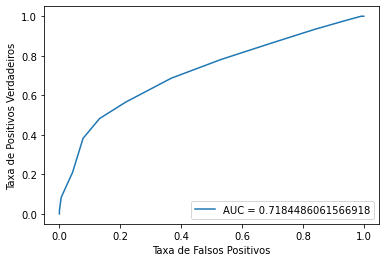

In [22]:
# Realizando cálculo da curva ROC e métrica AUC:
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

# Visualização da curva ROC de acordo com a métrica AUC:
plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

**Comentário:** A curva ROC obtida nos mostra que o modelo possui aceitável acertividade, porém possui um resultado reduzido em comparação ao de Regressão Linear, o mesmo ocorre com a métrica AUC. 

## Modelo Árvore de Decisão (_Decision Tree_)

Na Árvore de Decisão, o modelo captura dados, entende seus relacionamentos, realiza cálculos para entender quais nós são mais importantes e ajusta as condições.

 - Modelo baseado na estrutura de dados Árvore Binária como uma raiz e vários ramos e folhas sendo os dados. 
 - O modelo foi escolhido por precisar de pouco esforço na preparação de dados, ou seja, não necessita de normalização, e por conseguir lidar com valores faltantes. 
 - Além disso, é um modelo muito popular para problemas de classificação, regressão e análise exploratória. 
 - Apesar disso, há de ser ter um maior cuidado pois pequenas variações podem gerar árvores completamente diferentes umas das outras.

In [23]:
# Separação dos dados para teste e treino:
X = dadosTreinoBalanceados.drop([85], axis=1)
y = dadosTreinoBalanceados[85]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo da Árvore de Decisão:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', dt_pred)

Resultados do modelo:
 [0.71428571 0.47619048 0.42857143 0.61904762 0.66666667 0.28571429
 0.52380952 0.61904762 0.61904762 0.7       ]

Média dos resultados: 0.5652380952380953

Predições feitas:
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1

**Comentário:** Baseado nos resultados obtidos pelo valor da validação cruzada, é observado que o modelo possui a menor média de todos os modelos até agora, mesmo assim o modelo ainda está dentro dos padrões mínimos de qualidade.

In [24]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[308,  40],
       [ 40, 308]], dtype=int64)

In [25]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.8850574712643678 

Precisão (Precision):  0.8850574712643678 

Especificidade (Specificity):  0.8850574712643678 

F1 Macro:  0.8850574712643678 

F1 Micro:  0.8850574712643678


**Comentário:** Pelos os resultados o modelo aparenta ser excelente, sendo o com as maiores métricas, dentre os modelos até então analisados.

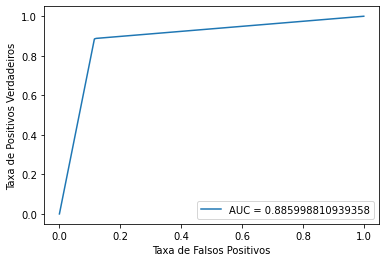

In [26]:
# Realizando cálculo da curva ROC e métrica AUC:
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

# Visualização da curva ROC de acordo com a métrica AUC.
plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

**Comentário:** Tanto na curva ROC como na métrica AUC obtida, o resultado nos mostra que o modelo possui alta acertividade, e em comparação aos modelos até então analisados é o com o melhor resultado geral.

## Modelo Naive Bayes

É baseado no teorema de Bayes, o que é a probabilidade de um evento ocorrer, observando o
acontecimento de outro evento associado, gerando uma tabela de probabilidades.

- Escolhemos o Naive Bayes, pois por ser característico de analisar cada variável de forma individual (por isso é chamado de "inocente"), não criando correlações entre elas, o que permite um resultado mais focado na solução de certos problemas.
- Seu funcionamente consiste em encontrar uma probabilidade futura e multiplicá-la pela probabilidade passada, o que gera um resultado não normalizado da probabilidade; No final obtemos uma porcentagem da probabilidade do item que queremos descobrir.
- Por não criar correlações não é ideal para problemas onde correlações é um fator extremamente importante, mas pode ser implementado como outro ponto de vista em análises cujo um outro método que cria ligações também esteja implementado.

In [27]:
# Separação dos dados para teste e treino:
X = dadosTreinoBalanceados.drop([85], axis=1)
y = dadosTreinoBalanceados[85]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo Naive Bayes:
model = MultinomialNB(alpha=0.01, fit_prior=True)
model.fit(X_train, y_train)
nb_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', nb_pred)

Resultados do modelo:
 [0.61904762 0.57142857 0.57142857 0.71428571 0.76190476 0.61904762
 0.57142857 0.61904762 0.66666667 0.7       ]

Média dos resultados: 0.6414285714285715

Predições feitas:
 [0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1

**Comentário:** Baseado nos resultados obtidos pelo valor da validação cruzada, é observado que o modelo possui a maior média de todos os modelos analisados, mesmo assim o modelo ainda está dentro dos padrões mínimos de qualidade, mas não é um resultado excepcional.

In [28]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[241, 107],
       [127, 221]], dtype=int64)

In [29]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.6925287356321839 

Precisão (Precision):  0.654891304347826 

Especificidade (Specificity):  0.6350574712643678 

F1 Macro:  0.6635152556940267 

F1 Micro:  0.6637931034482759


**Comentário:** Pelos os resultados o modelo aparenta ser mediano, com os resultados abaixo do modelo Árvore de Decisão, confirmando que este último é o modelo com os melhores resultados.

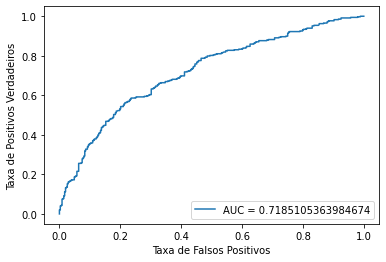

In [30]:
# Realizando cálculo da curva ROC e métrica AUC:
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

# Visualização da curva ROC de acordo com a métrica AUC.
plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

**Comentário:** Tanto na curva ROC como na métrica AUC obtida, o resultado nos mostra que o modelo possui aceitável acertividade, e assim como nas métricas de avaliação está abaixo do modelo Árvore de Decisão, o que confirma igualmente que este último é o melhor modelo nesta métrica.

# Modelo escolhido

Tendo em vista os modelos analisados, o melhor resultado é o Naive Bayes, contudo conforme explicamos acima, este modelo em específico não faz a correlação entre as variáveis dadas, o que vemos como estritamente necessário para uma boa avaliação. Portanto, escolhemos o modelo Árvore de Decisão, pois apesar de não possuir a maior média em em validação cruzada, possui as maiores métricas de avaliação, curva ROC e métrica AUC.

# Aplicação nos Dados de Validação

In [43]:
# Separação dos dados para teste e treino:
X = dadosValidacao
y = dadosClassificao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Criação e treino do modelo da Árvore de Decisão:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
val_pred = model.predict(X)

# Aplicação da validação cruzada K-Fold:
kfold_validation = KFold(10)
result = cross_val_score(model, X_test, y_test, cv = kfold_validation)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', result)
print('\nMédia dos resultados:', np.mean(result))
print('\nPredições feitas:\n', val_pred)

Resultados do modelo:
 [0.925      0.88333333 0.875      0.825      0.9        0.85
 0.91666667 0.85833333 0.875      0.9       ]

Média dos resultados: 0.8808333333333334

Predições feitas:
 [0 1 0 ... 0 0 0]


**Comentário:** Baseado nos resultados obtidos pelo valor da validação cruzada, podemos visualizar que há um aumento comparado com os dados de teste, possuindo uma média que pode ser considerada como excelente.

In [44]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
c_matrix = confusion_matrix(y, model.predict(X))
c_matrix

Matriz de confusão:


array([[3687,   75],
       [  82,  156]], dtype=int64)

In [45]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', c_matrix[0, 0] / sum(c_matrix[0, :]), '\n')
print('Precisão (Precision): ', c_matrix[0, 0] / sum(c_matrix[:, 0]), '\n')
print('Especificidade (Specificity): ', c_matrix[1, 1] / sum(c_matrix[1, :]), '\n')
print('F1 Macro: ', f1_score(y, model.predict(X), average='macro'), '\n')
print('F1 Micro: ', f1_score(y, model.predict(X), average='micro'))

Revocação (Recall):  0.9800637958532695 

Precisão (Precision):  0.9782435659326081 

Especificidade (Specificity):  0.6554621848739496 

F1 Macro:  0.8221990187537567 

F1 Micro:  0.96075


**Comentário:** Pelos os resultados o modelo aparenta ser excelente, com a Revocação sendo praticamente ideal cojuntamente com a Precisão; a especificidade é mediana o que indica que a maior parte das amostras negativas foram classificadas como falsas, mas pode ocorrer de alguma destas serem classificadas como positivas. As F1 Macro e Micro nos mostra que o modelo está predigindo os verdadeiros e falsos de forma correta, com uma boa taxa de acerto. 

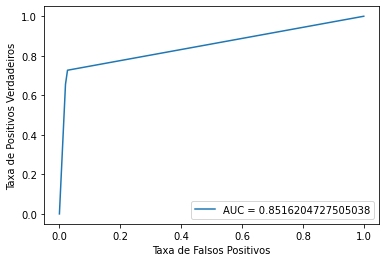

In [46]:
# Realizando cálculo da curva ROC e métrica AUC:
probabilidades_y = model.predict_proba(X)[::,1]
falso_positivo, verdadeiro_positivo, _ = roc_curve(y, probabilidades_y)
auc = roc_auc_score(y, probabilidades_y)

# Visualização da curva ROC de acordo com a métrica AUC.
plt.plot(falso_positivo, verdadeiro_positivo, label = "AUC = " + str(auc))
plt.ylabel('Taxa de Positivos Verdadeiros')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc = 4)
plt.show()

**Comentário:** Ambas, a curva ROC e a métrica AUC obtidas, nos indicam que possuem alta taxa de acerto nos mostrando que o modelo é excelente, porém não é o mais correto possível (Métrica 0.99 de acertos).

# Referências

- [Stack Overflow Loading TXT with Pandas](https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas)
- [Vitalflux Hold-out Method for Training Machine Learning Models](https://vitalflux.com/hold-out-method-for-training-machine-learning-model/)
- [Statology K-Fold Cross Validation](https://www.statology.org/k-fold-cross-validation-in-python/)
- [Statology Leave-one-out (LOO) Cross Validation](https://www.statology.org/leave-one-out-cross-validation-in-python/)
- [Skelearn Feature Select](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Machine Learning Mastery K-Fold](https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/)
- [Machine Learning Knowledge Cross Validation](https://machinelearningknowledge.ai/cross-validation-in-sklearn-hold-out-approach-k-fold-cross-validation-loocv/)
- [Towards Data Science Machine Learning Classification](https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5)
- [Skelearn Metrics F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Regressão Logísticas e suas aplicações](https://monografias.ufma.br/jspui/bitstream/123456789/3572/1/LEANDRO-GONZALEZ.pdf)
- [Cross Validation Paper](https://web.archive.org/web/20110905044421/http://www.public.asu.edu/~ltang9/papers/ency-cross-validation.pdf)
- [Inferir: Algorítmo kNN para classificação](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/)
- [Organica Digital: Algorítmo de classificação Naive Bayes](https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/)
- [Towards Data Science F1-Score Explained](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f)
- [Vitor Rodrigues: Métricas de Avaliação](https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c)
- [Organica Digital: Algorítmo de Classificação Naive Bayes](https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/)
- [Medium: Árvores de Decisão](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)
- [Medium: kNN](https://medium.com/turing-talks/turing-talks-13-modelo-de-predi%C3%A7%C3%A3o-knn-3be880c9b9d1)
- [Medium: Regressão Logística](https://medium.com/@msremigio/regress%C3%A3o-log%C3%ADstica-logistic-regression-997c6259ff9a)